Week 6: Exercise 29, 4.2 Ordinary least squares regression: Linear function

In [168]:
xs = [-1, 1, 2, 4, 5]

In [169]:
# Define a linear function with slope and intercept as parameters
def lin_func(x, slope=2, intercept=3):
    return slope * x + intercept

for i, x in enumerate(xs):
    print(f"x = {x}, y = {lin_func(x)}")

x = -1, y = 1
x = 1, y = 5
x = 2, y = 7
x = 4, y = 11
x = 5, y = 13


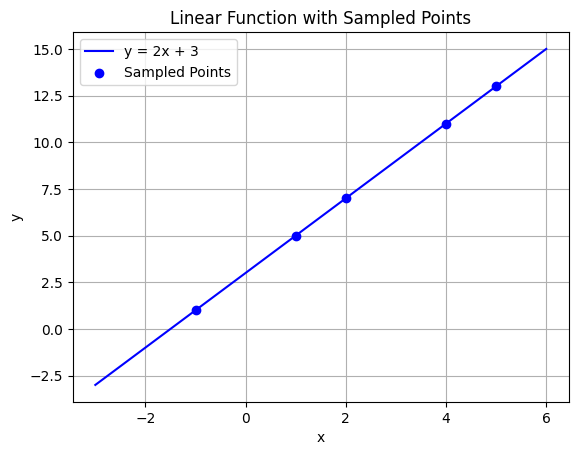

In [170]:
#  Plot the function and indicate the sampled points

import numpy as np
import matplotlib.pyplot as plt

# Define the range of x values for plotting
x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = lin_func(x_values)

# Sampled points
ys = [lin_func(x) for x in xs]

# Plot the linear function
plt.plot(x_values, y_values, label="y = 2x + 3", color="blue")

# Plot the sampled points
plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Function with Sampled Points")

# Show the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

In [171]:
# Introduce a function \Phi: x -> [1 x]

def Phi(x):
    return [1, x]

def X(xs):
    y = np.empty((0, 2))  

    for x in xs:
        y = np.append(y, [Phi(x)], axis=0) 

    return y

print(X(xs))


[[ 1. -1.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  4.]
 [ 1.  5.]]


In [172]:
# Calculate the coefficients of the linear function, i.e. beta_0 and beta_1
X = X(xs)
y = ys
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the linear function are {beta}.")

The coefficients of the linear function are [3. 2.].


(2,)
2.999999999999999


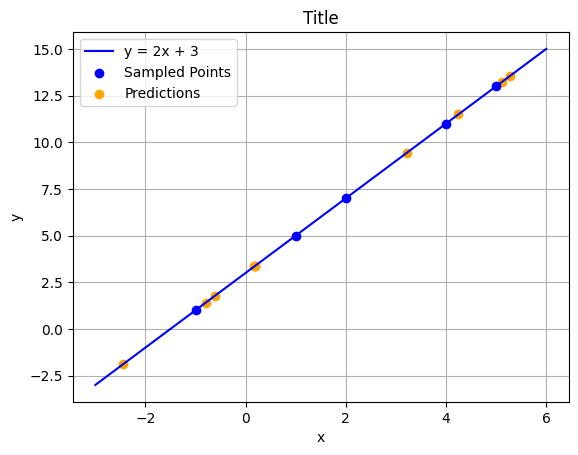

In [173]:
x_random = np.random.uniform(-3, 6, 10)
print(beta.shape)
print(beta[0])

y_new = beta[1] * x_random + beta[0]

# Plot the linear function
plt.plot(x_values, y_values, label="y = 2x + 3", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")
plt.scatter(x_random[:], y_new, color='orange', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()

4.3 Quadratic function:
Choose a parabola, plot it, sample it at some x-values

In [174]:
# Define a quadratic function
def quad_func(x, a=1, b=2, c=-3):
    y = a * x**2 + b * x + c
    return y

for i, x in enumerate(xs):
    print(f"x = {x}, y = {quad_func(x)}")

x = -1, y = -4
x = 1, y = 0
x = 2, y = 5
x = 4, y = 21
x = 5, y = 32


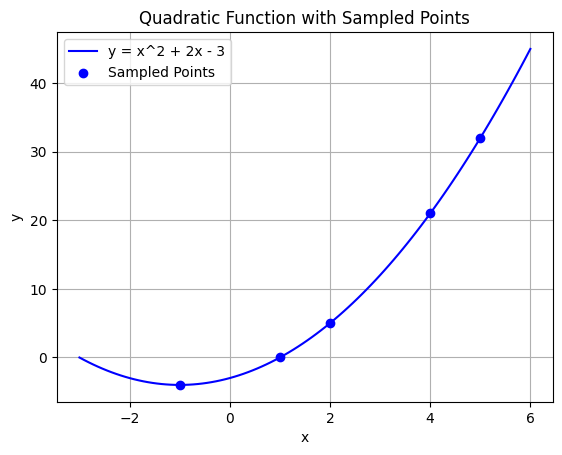

In [175]:
#  Plot the function and indicate the sampled points

# Define the range of x values for plotting
x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = quad_func(x_values)

# Sampled points
ys = [quad_func(x) for x in xs]

# Plot the linear function
plt.plot(x_values, y_values, label="y = x^2 + 2x - 3", color="blue")

# Plot the sampled points
plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Function with Sampled Points")

# Show the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

The coefficients of the linear function are [-2.63157895  6.10526316]. This is NOT a linear function, though.


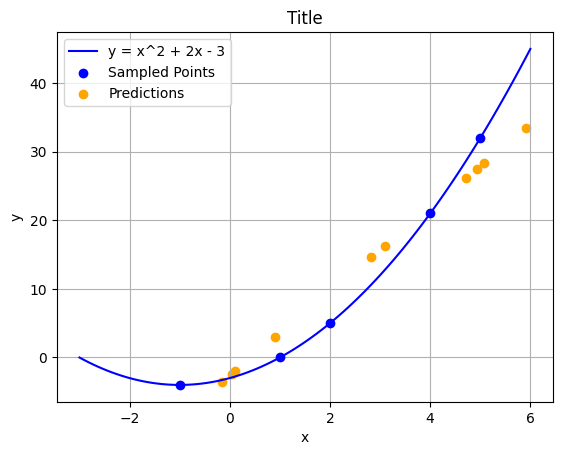

In [176]:
y = ys
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the linear function are {beta}. This is NOT a linear function, though.")

x_random = np.random.uniform(-3, 6, 10)
y_new = beta[1] * x_random + beta[0]

x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = quad_func(x_values)

# Plot the linear function
plt.plot(x_values, y_values, label="y = x^2 + 2x - 3", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")
plt.scatter(x_random[:], y_new, color='orange', label='Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()

c) Introdcue a function Phi: x -> [1 x x^2] and use Phi to construct matrix

In [177]:
def Phi(x):
    return [1, x, x**2]

def X(xs):
    y = np.empty((0, 3))  

    for x in xs:
        y = np.append(y, [Phi(x)], axis=0)  # Append along rows

    return y

# Test input
print(X(xs))


[[ 1. -1.  1.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


In [178]:
ys = [quad_func(x) for x in xs]
y = ys
X = X(xs)
print(y)
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the quadratic function are {beta}.")

[-4, 0, 5, 21, 32]
The coefficients of the quadratic function are [-3.  2.  1.].


The coefficients of the quadratic function are [-3.  2.  1.]


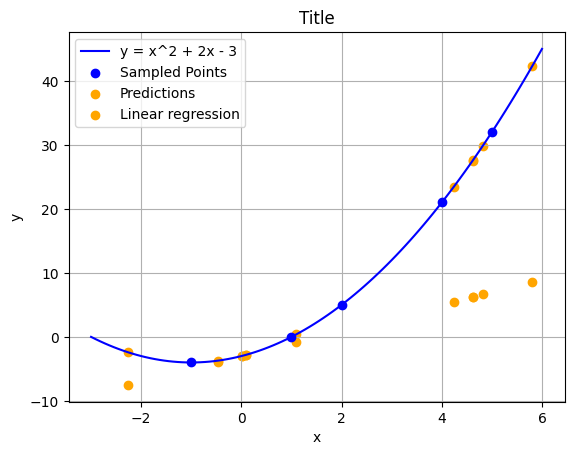

In [186]:
y = ys
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the quadratic function are {beta}")

x_random = np.random.uniform(-3, 6, 10)
y_new_quad = beta[2] * x_random**2 + beta[1] * x_random + beta[0]
y_new_lin = beta[1] * x_random + beta[0] 

x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = quad_func(x_values)

# Plot the linear function
plt.plot(x_values, y_values, label="y = x^2 + 2x - 3", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")
plt.scatter(x_random[:], y_new_quad, color='orange', label='Predictions')
plt.scatter(x_random[:], y_new_lin, color='orange', label='Linear regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()

5.2 Target function: a) Define a non-trivial func and sample for some vals of x.

In [ ]:
def non_triv_func(x):
    y = np.sin(2 * x) #+ 2 * x
    return y

for i, x in enumerate(xs):
    print(f"x = {x}, y = {non_triv_func(x)}")

x = -1, y = -0.9092974268256817
x = 1, y = 0.9092974268256817
x = 2, y = -0.7568024953079282
x = 4, y = 0.9893582466233818
x = 5, y = -0.5440211108893698


Plot the func and indicate the sampled points.

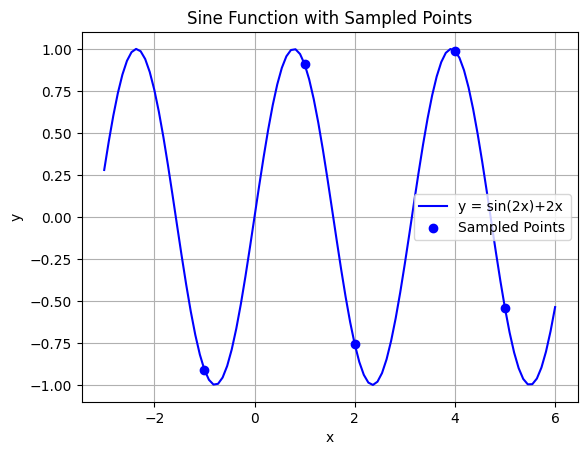

In [ ]:
#  Plot the function and indicate the sampled points

# Define the range of x values for plotting
x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = non_triv_func(x_values)

# Sampled points
ys = [non_triv_func(x) for x in xs]

# Plot the linear function
plt.plot(x_values, y_values, label="y = sin(2x)+2x", color="blue")

# Plot the sampled points
plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

# Add labels and title
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sine Function with Sampled Points")

# Show the legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

5.3 OLS regression: b) Do non-linear fit with polynomial terms up to order 3 using OLS regression

In [ ]:
# Introduce a function \Phi: x -> [1 x x^2 x^3]

def Phi(x):
    return [1, x, x**2, x**3]

def X(xs):
    y = np.empty((0, 4))  

    for x in xs:
        y = np.append(y, [Phi(x)], axis=0) 

    return y

print(xs)
print(X(xs))


[-1, 1, 2, 4, 5]
[[  1.  -1.   1.  -1.]
 [  1.   1.   1.   1.]
 [  1.   2.   4.   8.]
 [  1.   4.  16.  64.]
 [  1.   5.  25. 125.]]


In [ ]:
ys = [non_triv_func(x) for x in xs]

X = X(xs)
y = ys
# print(y)
beta = np.linalg.inv(X.T @ X) @(X.T @ y)

print(f"The coefficients of the cubic function are {beta}.")

The coefficients of the cubic function are [-0.36218045  0.44375124 -0.0058801  -0.01576377].


The coefficients of the cubic function are [-0.36218045  0.44375124 -0.0058801  -0.01576377]
[-0.53264211 -0.1097986  -1.46995339 -2.48883928 -0.62930155 -2.37024732
  4.06756334 -0.71299078 -2.18929288  0.61873709] [-0.59181284 -0.40924377 -1.00400759 -1.4637957  -0.63384228 -1.40965143
  1.2813991  -0.67032076 -1.32735371 -0.09961984]


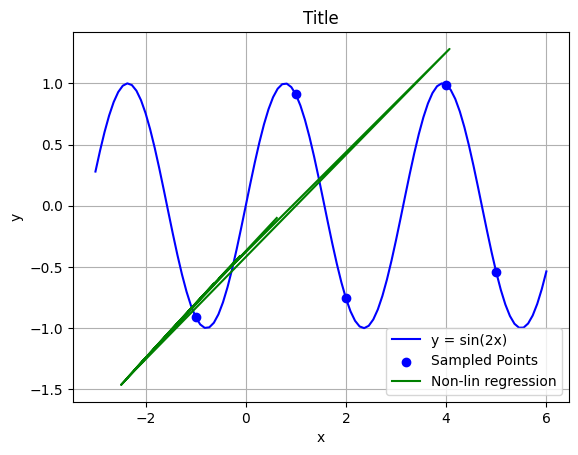

In [ ]:
print(f"The coefficients of the cubic function are {beta}")

x_random = np.random.uniform(-3, 6, 10)
y_new_cubic = beta[3] * x_random + beta[2] * x_random**2 + beta[1] * x_random + beta[0]

x_values = np.linspace(-3, 6, 100)  # 100 points between 0 and 6
y_values = non_triv_func(x_values)

# Plot the function
plt.plot(x_values, y_values, label="y = sin(2x)", color="blue")

plt.scatter(xs, ys, color="blue", zorder=5, label="Sampled Points")

# plot the cubic function
print(x_random,y_new_cubic)
plt.plot(x_random[:], y_new_cubic, color='green', label='Non-lin regression')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Title')
plt.legend()
plt.grid(True)
plt.show()